# Check math
Stefan/Yuzhao Heng
Since Sun. Dec. 5th, 2021


## Inverse transformation
It might help to run ICP with one order of (source, target), but the other order produces clearer visualizations
How to visualize in reverse?



### Setup



In [1]:
from scripts.util import *
from scripts.robo_pose_estimator import *


pcr_kuka = get_kuka_pointcloud()
pts_hsr = eg_hsr_scan()



### Check
#### For one without theta
Just invert the x and y translations, looks good


ic| 'Initial guess': 'Initial guess'
    init_tsf: array([[ 1. , -0. , -2.5],
                     [ 0. ,  1. ,  0.5],
                     [ 0. ,  0. ,  1. ]])
ic| tsf_: array([[ 0.99738895, -0.07221688, -2.52595887],
                 [ 0.07221688,  0.99738895,  0.5194569 ],
                 [ 0.        ,  0.        ,  1.        ]])
    tsl: array([-2.52595887,  0.5194569 ])
    degrees(theta): 4.141327379332864


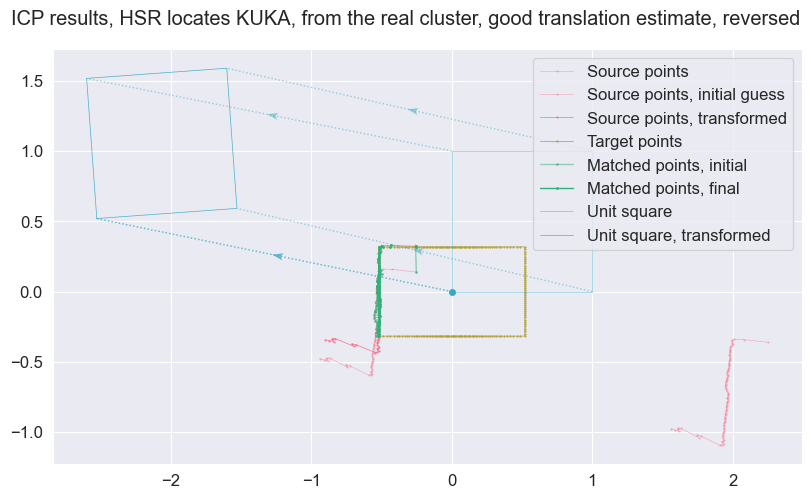

In [2]:
lbs = Cluster.cluster(pts_hsr, approach='hierarchical', distance_threshold=1)
d_clusters = {lb: pts_hsr[np.where(lbs == lb)] for lb in np.unique(lbs)}
pts_cls = d_clusters[11]

x, y = config('heuristics.pose_guess.good_no_rotation')
tsf, states = visualize(
    pts_cls, pcr_kuka,
    title='HSR locates KUKA, from the real cluster, good translation estimate, reversed',
    init_tsf=tsl_n_angle2tsf([-x, -y]),
)
# tsf_rev = np.linalg.inv(tsf)  # Looks like this works
# states_rev = [(tgt, src, np.linalg.inv(tsf)) for (src, tgt, tsf, err) in states]  # This doesn't
# plot_icp_result(pcr_kuka, pts_cls, tsf_rev, init_tsf=tsl_n_angle2tsf([x, y]))



#### With theta


ic| tsf1: array([[ 0.99545111, -0.09527375, -2.53824214],
                 [ 0.09527375,  0.99545111,  0.52595056],
                 [ 0.        ,  0.        ,  1.        ]])
    tsf2: array([[ 0.99545111, -0.09527375, -2.47658667],
                 [ 0.09527375,  0.99545111,  0.76538593],
                 [ 0.        ,  0.        ,  1.        ]])
ic| 'Initial guess': 'Initial guess'
    init_tsf: array([[ 0.99545111, -0.09527375, -2.53824214],
                     [ 0.09527375,  0.99545111,  0.52595056],
                     [ 0.        ,  0.        ,  1.        ]])
ic| tsf_: array([[ 0.99682352, -0.07964209, -2.52500609],
                 [ 0.07964209,  0.99682352,  0.51523587],
                 [ 0.        ,  0.        ,  1.        ]])
    tsl: array([-2.52500609,  0.51523587])
    degrees(theta): 4.5679932186838865


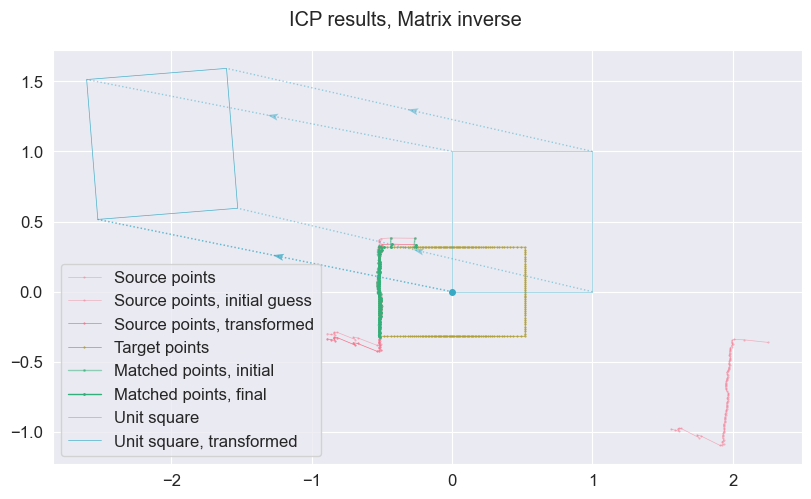

ic| 'Initial guess': 'Initial guess'
    init_tsf: array([[ 0.99545111, -0.09527375, -2.53824214],
                     [ 0.09527375,  0.99545111,  0.52595056],
                     [ 0.        ,  0.        ,  1.        ]])
ic| tsf_: array([[ 0.99682352, -0.07964209, -2.52500609],
                 [ 0.07964209,  0.99682352,  0.51523587],
                 [ 0.        ,  0.        ,  1.        ]])
    tsl: array([-2.52500609,  0.51523587])
    degrees(theta): 4.5679932186838865


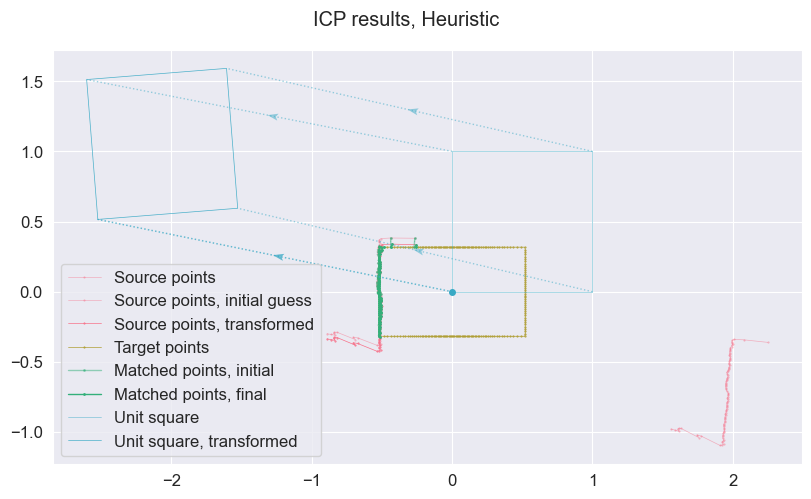

In [7]:
cand = (2.4765866676985326, -0.7653859276855487, -0.09541848029809685)  # Taken from RANSAC output
tsf1 = np.linalg.inv(tsl_n_angle2tsf(cand))
tsf2 = tsl_n_angle2tsf([-e for e in cand])
ic(tsf1, tsf2)

for label, tsf in zip(['Matrix inverse', 'Heuristic'], [tsf1, tsf1]):
    visualize(
        pts_cls, pcr_kuka,
        title=label,
        init_tsf=tsf,
    )
    # plot_icp_result(pcr_kuka, pts_cls, tsf2, init_tsf=tsf1))

